In [99]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv


In [100]:
wine_data=pd.read_csv("/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv")

In [101]:
wine_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [102]:
wine_data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [103]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


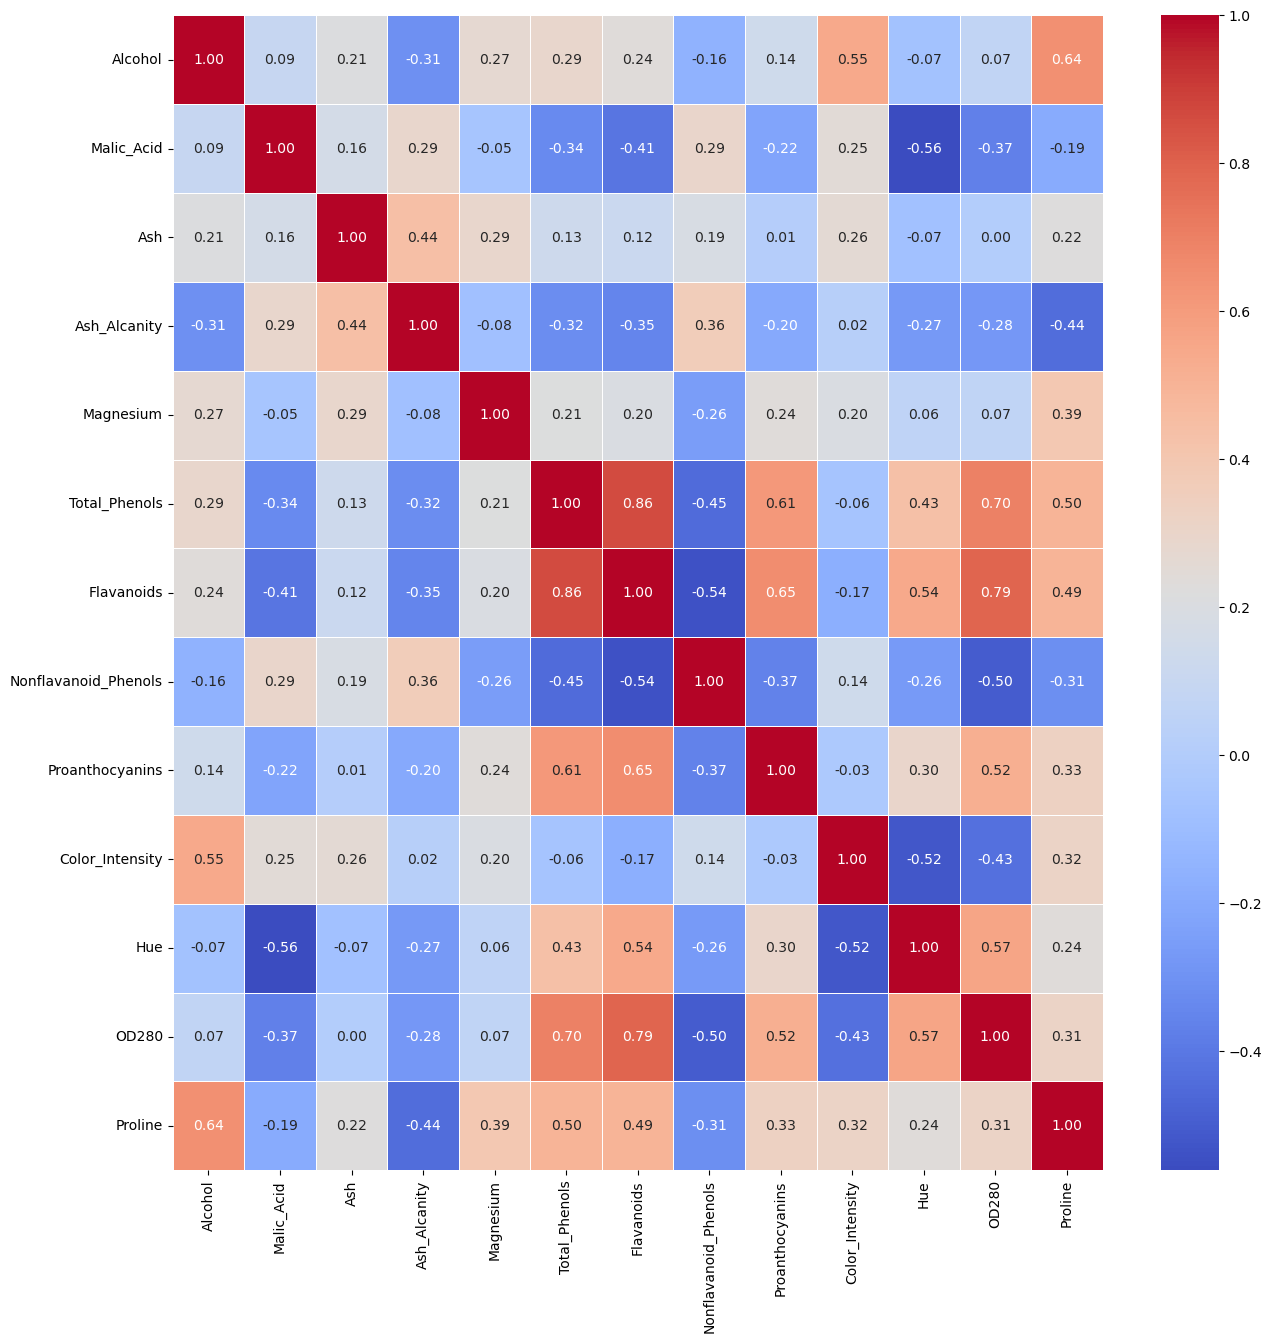

In [104]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(wine_data.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

In [105]:
#Flavanoids have high correlations
wine_data.drop(columns=['Flavanoids'],inplace=True)

In [106]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00
Hue,178.0,0.957449,0.228572,0.48,0.7825,0.965,1.1200,1.71


In [107]:
def treat_out(df):
    for cols in df.columns:
        df[cols]=df[cols].clip(upper=df[cols].quantile(0.99))
    return df

In [108]:
wine_data=treat_out(wine_data)

In [109]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,12.997054,0.804575,11.03,12.3625,13.050,13.6775,14.4728
Malic_Acid,178.0,2.334294,1.111002,0.74,1.6025,1.865,3.0825,5.5422
Ash,178.0,2.363865,0.267036,1.36,2.2100,2.360,2.5575,2.9890
Ash_Alcanity,178.0,19.486517,3.314706,10.60,17.2000,19.500,21.5000,28.5000
Magnesium,178.0,99.575955,13.680946,70.00,88.0000,98.000,107.0000,141.7600
Total_Phenols,178.0,2.292089,0.618829,0.98,1.7425,2.355,2.8000,3.5959
Nonflavanoid_Phenols,178.0,0.361685,0.124067,0.13,0.2700,0.340,0.4375,0.6300
Proanthocyanins,178.0,1.586445,0.559125,0.41,1.2500,1.555,1.9500,3.0336
Color_Intensity,178.0,5.042848,2.272948,1.28,3.2200,4.690,6.2000,11.0185
Hue,178.0,0.955729,0.223969,0.48,0.7825,0.965,1.1200,1.4269


In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
sc=StandardScaler()

In [112]:
wine_scaled_data=sc.fit_transform(wine_data)

In [113]:
wine_scaled_data

array([[ 1.53674123, -0.56350501,  0.24836156, ...,  0.37732304,
         1.74697226,  1.02531586],
       [ 0.25295153, -0.50032112, -0.84069923, ...,  0.42209811,
         1.11912027,  0.97712327],
       [ 0.20309562,  0.02320259,  1.14965324, ...,  0.33254797,
         0.79314745,  1.41085654],
       ...,
       [ 0.34019937,  1.75624657, -0.39005339, ..., -1.63755512,
        -1.48866229,  0.28636287],
       [ 0.21555959,  0.23080681,  0.02303864, ..., -1.59278005,
        -1.4036259 ,  0.30242707],
       [ 1.41210145,  1.5937737 ,  1.41252999, ..., -1.54800498,
        -1.43197137, -0.59716787]])

In [23]:
from sklearn.decomposition import PCA

In [114]:
pca=PCA(n_components=12)

In [115]:
pca.fit(wine_scaled_data)

PCA(n_components=12)

In [116]:
pca.explained_variance_

array([3.96701611, 2.55375874, 1.39667683, 0.89697895, 0.82076898,
       0.63540731, 0.5295001 , 0.33621013, 0.29331879, 0.2418604 ,
       0.2267724 , 0.16952789])

In [117]:
var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

In [118]:
pd.DataFrame({'Eigen':pca.explained_variance_,'cumm_var':var},index=range(1,13))
#5 clusters looks good

,Eigen,cumm_var
1,3.967016,32.87
2,2.553759,54.03
3,1.396677,65.60
4,0.896979,73.03
5,0.820769,79.83
6,0.635407,85.10
7,0.529500,89.49
8,0.336210,92.28
9,0.293319,94.71
10,0.241860,96.71


In [119]:
pc_final=PCA(n_components=4).fit(wine_scaled_data)

In [120]:
reduced_cr=PCA(n_components=4).fit_transform(wine_scaled_data)

In [121]:
dimensions=pd.DataFrame(reduced_cr,columns=['C1','C2','C3','C4'])

In [122]:
dimensions

,C1,C2,C3,C4
0,3.196079,-1.527552,-0.023418,-0.023097
1,2.186198,0.341559,1.950140,-0.395320
2,2.203522,-1.058933,-1.042192,0.796583
3,3.312299,-2.768263,0.147819,0.540030
4,0.769020,-0.950000,-2.107886,-0.302725
...,...,...,...,...
173,-3.055977,-2.221089,0.512000,0.892001
174,-2.292334,-1.794126,-0.157641,0.415612
175,-2.293559,-2.829593,1.024834,0.454283
176,-1.968169,-2.364955,0.554823,-0.569915


In [123]:
Loading=pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=wine_data.columns).T

In [124]:
Loading

,0,1,2,3
Alcohol,0.330229,-0.766842,0.226289,-0.038445
Malic_Acid,-0.556435,-0.362435,-0.054077,0.500266
Ash,-0.045281,-0.519782,-0.747613,-0.189507
Ash_Alcanity,-0.568204,0.014488,-0.702710,0.084572
Magnesium,0.327751,-0.505116,-0.199805,-0.219499
Total_Phenols,0.829772,-0.091138,-0.209304,0.203156
Nonflavanoid_Phenols,-0.664714,-0.046252,-0.164534,-0.272317
Proanthocyanins,0.671642,-0.055728,-0.208441,0.439934
Color_Intensity,-0.188973,-0.840099,0.202944,0.040834
Hue,0.666243,0.430289,-0.158442,-0.395739


In [125]:
from sklearn.cluster import KMeans

In [126]:
#clustering
Km_3=KMeans(n_clusters=3,random_state=123)
Km_3.fit(dimensions)
Km_3.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [127]:
Km_4=KMeans(n_clusters=4,random_state=123)
Km_4.fit(dimensions)
Km_4.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 0, 3, 3, 2, 2,
       3, 3, 2, 3, 2, 2, 2, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 0, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 1, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       3, 3, 2, 2, 2, 2, 3, 2, 0, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [128]:
Km_5=KMeans(n_clusters=5,random_state=123)
Km_5.fit(dimensions)
Km_5.labels_

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 3, 4, 4, 3, 1,
       4, 4, 3, 4, 3, 1, 3, 1, 1, 4, 4, 3, 4, 1, 4, 4, 3, 0, 1, 4, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 2, 1, 4, 4, 1, 4, 4, 1, 4, 4, 3, 4, 3, 4, 1,
       1, 4, 3, 3, 3, 3, 4, 3, 3, 4, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [129]:
Km_6=KMeans(n_clusters=6,random_state=123)
Km_6.fit(dimensions)
Km_6.labels_

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 1, 2, 2, 4, 3,
       2, 2, 4, 2, 4, 3, 4, 3, 3, 2, 2, 4, 2, 3, 2, 2, 4, 1, 3, 2, 4, 4,
       4, 4, 4, 4, 4, 2, 2, 0, 3, 2, 2, 3, 2, 2, 3, 2, 2, 4, 2, 4, 2, 3,
       3, 2, 4, 4, 4, 4, 2, 4, 1, 2, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 1, 1,
       1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5,
       1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 5, 5, 5, 5,
       5, 5], dtype=int32)

In [130]:
Km_7=KMeans(n_clusters=7,random_state=123)
Km_7.fit(dimensions)
Km_7.labels_

array([2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4,
       2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 1, 2, 2, 5, 2, 5,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 1, 6, 3, 1, 1, 6, 4,
       1, 1, 6, 1, 6, 4, 6, 4, 5, 1, 1, 6, 1, 5, 1, 1, 6, 3, 5, 1, 6, 6,
       6, 6, 6, 6, 6, 5, 1, 4, 4, 1, 1, 5, 1, 1, 5, 1, 1, 6, 1, 6, 1, 5,
       5, 5, 6, 6, 6, 6, 1, 6, 3, 5, 5, 4, 5, 5, 5, 5, 5, 6, 5, 5, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [131]:
wine_data['cluster_3']=Km_3.labels_
wine_data['cluster_4']=Km_4.labels_
wine_data['cluster_5']=Km_5.labels_
wine_data['cluster_6']=Km_6.labels_
wine_data['cluster_7']=Km_7.labels_

In [132]:
pd.Series(Km_3.labels_).value_counts()/sum(pd.Series(Km_3.labels_).value_counts())

0    0.359551
2    0.353933
1    0.286517
dtype: float64

In [133]:
pd.Series(Km_4.labels_).value_counts()/sum(pd.Series(Km_4.labels_).value_counts())

1    0.320225
0    0.286517
3    0.207865
2    0.185393
dtype: float64

In [134]:
pd.Series(Km_5.labels_).value_counts()/sum(pd.Series(Km_5.labels_).value_counts())

2    0.297753
0    0.269663
3    0.157303
4    0.146067
1    0.129213
dtype: float64

In [135]:
pd.Series(Km_6.labels_).value_counts()/sum(pd.Series(Km_6.labels_).value_counts())

0    0.297753
1    0.162921
2    0.151685
4    0.140449
3    0.123596
5    0.123596
dtype: float64

In [137]:
#Silhouette score
from sklearn import metrics
k_range=range(3,8)
scores=[]
for k in k_range:
    Km=KMeans(n_clusters=k,random_state=123)
    Km.fit(dimensions)
    scores.append(metrics.silhouette_score(dimensions,Km.labels_))


In [138]:
scores

[0.4031523242662812,
 0.36152796758442884,
 0.34481031354038305,
 0.300681137442724,
 0.2640338639754713]

In [139]:
import matplotlib.pyplot as plt

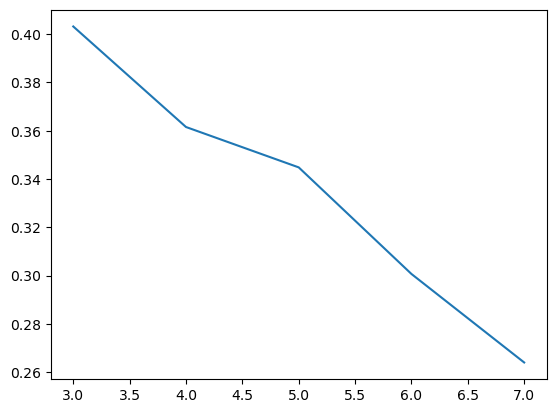

In [140]:
plt.plot(k_range,scores)

In [141]:
#Elblow Analysis
cluster_range=range(3,15)
elbow_score=[]
for k in cluster_range:
    Km=KMeans(n_clusters=k,random_state=123)
    Km.fit(dimensions)
    elbow_score.append(Km.inertia_)

In [142]:
elbow_score

[644.9700179515715,
 553.915841823085,
 497.07884350542116,
 449.7925640196474,
 400.79001296677427,
 372.9894646185469,
 350.3526771699223,
 327.5072178551936,
 303.3895964897985,
 286.1238515248909,
 270.99073904324956,
 258.7498169481904]

In [143]:
clusters_df=pd.DataFrame({'num_clusters':cluster_range,"elbow_score":elbow_score})

In [144]:
clusters_df

,num_clusters,elbow_score
0,3,644.970018
1,4,553.915842
2,5,497.078844
3,6,449.792564
4,7,400.790013
5,8,372.989465
6,9,350.352677
7,10,327.507218
8,11,303.389596
9,12,286.123852


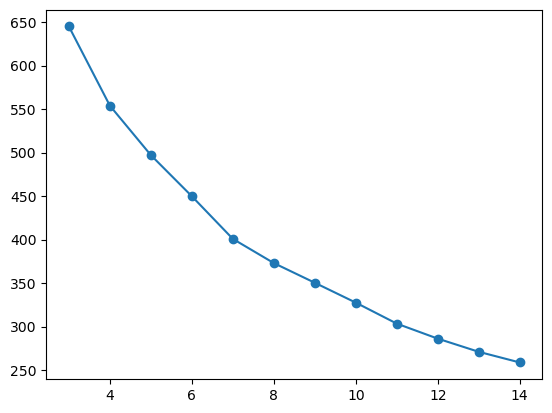

In [145]:
plt.plot(clusters_df.num_clusters,clusters_df.elbow_score,marker="o")

In [ ]:
#final cluster-5 looks good

In [146]:
size=pd.concat([pd.Series(wine_data.cluster_3.size),pd.Series.sort_index(wine_data.cluster_3.value_counts()),pd.Series.sort_index(wine_data.cluster_4.value_counts()),
               pd.Series.sort_index(wine_data.cluster_5.value_counts()),pd.Series.sort_index(wine_data.cluster_6.value_counts()),
               pd.Series.sort_index(wine_data.cluster_7.value_counts())])

In [147]:
Seg_size=pd.DataFrame(size,columns=['Seg_size'])
Seg_pct=pd.DataFrame(size/wine_data.cluster_3.size,columns=['Seg_Pct'])

In [148]:
Profiling_output=pd.concat([wine_data.apply(lambda x:x.mean()),wine_data.groupby('cluster_3').apply(lambda x:x.mean()).T,
                           wine_data.groupby('cluster_4').apply(lambda x:x.mean()).T,wine_data.groupby('cluster_5').apply(lambda x:x.mean()).T,
                           wine_data.groupby('cluster_6').apply(lambda x:x.mean()).T,wine_data.groupby('cluster_7').apply(lambda x:x.mean()).T],axis=1)

In [149]:
Profiling_output

,0,0,1,2,0,1,2,3,0,1,...,3,4,5,0,1,2,3,4,5,6
Alcohol,12.997054,12.239531,13.134118,13.655644,13.134118,13.736765,12.230303,12.352432,13.165000,12.494783,...,12.453182,12.158000,13.362727,13.362727,12.398261,13.920731,12.960690,13.274815,12.26800,12.157727
Malic_Acid,2.334294,1.920972,3.305141,1.968254,3.305141,1.937719,1.928788,1.968708,3.386087,2.669661,...,2.616464,1.790800,3.534191,3.534191,1.369565,1.952857,3.131379,1.890370,2.96861,1.667273
Ash,2.363865,2.254984,2.417647,2.430937,2.417647,2.455263,2.472970,2.051622,2.438542,2.500783,...,2.518091,2.381600,2.527273,2.527273,1.947826,2.348286,2.334483,2.655852,2.30400,2.395000
Ash_Alcanity,19.486517,20.328125,21.241176,17.211111,21.241176,17.121053,22.096970,18.383784,21.520833,21.456522,...,21.577273,21.664000,22.545455,22.545455,17.582609,15.885714,20.251724,19.925926,20.64000,21.550000
Magnesium,99.575955,91.562500,98.666667,108.452698,98.666667,107.715088,94.909091,92.452973,99.312500,101.913043,...,102.454545,90.440000,102.454545,102.454545,93.033043,105.914286,95.793103,110.880000,92.20000,91.272727
Total_Phenols,2.292089,2.273906,1.683922,2.802886,1.683922,2.854593,2.100606,2.434595,1.671458,2.694348,...,2.705455,1.952400,1.828636,1.828636,2.289565,2.926337,1.574138,2.706296,2.60350,1.904091
Nonflavanoid_Phenols,0.361685,0.362500,0.451961,0.287778,0.451961,0.285965,0.436364,0.287297,0.447708,0.310000,...,0.311818,0.464800,0.454091,0.454091,0.283913,0.261429,0.450345,0.326296,0.32050,0.474091
Proanthocyanins,1.586445,1.588025,1.145882,1.941486,1.145882,1.940765,1.490606,1.733341,1.161250,1.986243,...,2.009255,1.351200,1.432273,1.432273,1.573913,2.030000,0.928621,1.810133,1.93218,1.326364
Color_Intensity,5.042848,3.015625,7.181510,5.370952,7.181510,5.547368,2.948182,3.185946,7.326187,3.414783,...,3.375455,2.795600,8.871682,8.871682,3.347826,5.956000,5.899310,4.733333,2.78500,2.836818
Hue,0.955729,1.052497,0.691961,1.070952,0.691961,1.071754,1.068782,1.039730,0.684583,0.981739,...,0.985000,1.067992,0.623636,0.623636,1.129565,1.039429,0.743793,1.121111,0.90200,1.098173


In [150]:
final_data=pd.concat([Seg_size.T,Seg_pct.T,Profiling_output],axis=0)

In [151]:
final_data.to_csv("wine_data.csv")